<a href="https://colab.research.google.com/github/Inushki03/Coffee-Shop-FAQ-ChatBot/blob/main/Cat_and_Dog_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
import numpy as np
from google.colab import drive
import pandas as pd
import os
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_path="/content/drive/My Drive/cat and dog"
x_train=pd.read_csv(os.path.join(data_path,"input.csv")).values
y_train=pd.read_csv(os.path.join(data_path,"labels.csv")).values

x_test=pd.read_csv(os.path.join(data_path,"input_test.csv")).values
y_test=pd.read_csv(os.path.join(data_path,"labels_test.csv")).values

In [ ]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

<function matplotlib.pyplot.show(close=None, block=None)>

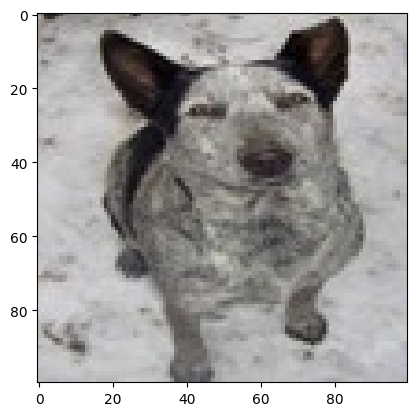

In [ ]:
idx=np.random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(32,(3,3),activation="relu"),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid")

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
cnn.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7536 - loss: 0.5116
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 777ms/step - accuracy: 0.7627 - loss: 0.4999
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 740ms/step - accuracy: 0.8154 - loss: 0.4166
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 709ms/step - accuracy: 0.8440 - loss: 0.3644
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 710ms/step - accuracy: 0.8680 - loss: 0.3134
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 713ms/step - accuracy: 0.8776 - loss: 0.2847
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 713ms/step - accuracy: 0.9340 - loss: 0.2084
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 703ms/step - accuracy: 0.9263 - loss: 0.2146
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 784ms/step - accuracy: 0.9419 - loss: 0.1732
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 704ms/step - accuracy: 0.9631 - loss: 0.1189


In [22]:
cnn.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.6140 - loss: 1.2073


[0.9919516444206238, 0.6666666865348816]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
It is a cat


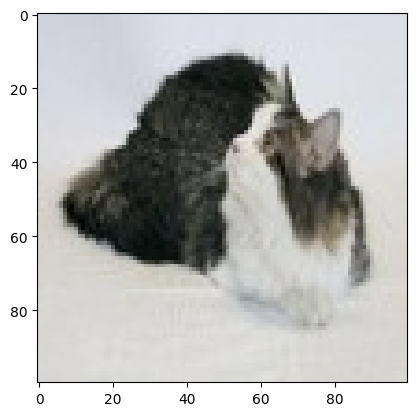

In [21]:
idx2=np.random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show


y_pred=cnn.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred= y_pred>0.5

if(y_pred==0):
  print("It is a dog")

else:
  print("It is a cat")